In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

# Import stats from scipy
from scipy import stats

### 1.1 Read the data and do exploratory data analysis. Describe the data briefly

In [3]:
df=pd.read_csv('bank_marketing_part1_Data.csv')

In [4]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [5]:
df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB



Observation:

    7 variables and 210 records.
    No missing record based on intial analysis.
    All the variables numeric type.



In [7]:
df.shape

(210, 7)

In [8]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

#### Univariate analysis

In [9]:
df.describe(percentiles=[.25,0.50,0.75,0.90]).T

,count,mean,std,min,25%,50%,75%,90%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,18.9880,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,16.4540,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.8993,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.2733,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,3.7865,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,5.5376,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.1850,6.5500


- Based on summary descriptive, the data looks good.
- We see for most of the variable, mean/medium are nearly equal
- Include a 90% to see variations and it looks distributely evenly
- Std Deviation is high for spending variable

In [10]:
print('Range of values: ', df['spending'].max()-df['spending'].min())

Range of values:  10.59


In [11]:
#Central values 
print('Minimum spending: ', df['spending'].min())
print('Maximum spending: ',df['spending'].max())
print('Mean value: ', df['spending'].mean())
print('Median value: ',df['spending'].median())
print('Standard deviation: ', df['spending'].std())
print('Null values: ',df['spending'].isnull().any())

Minimum spending:  10.59
Maximum spending:  21.18
Mean value:  14.847523809523818
Median value:  14.355
Standard deviation:  2.909699430687361
Null values:  False


In [12]:
#Quartiles

Q1=df['spending'].quantile(q=0.25)
Q3=df['spending'].quantile(q=0.75)
print('spending - 1st Quartile (Q1) is: ', Q1)
print('spending - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of spending is ', stats.iqr(df['spending']))

spending - 1st Quartile (Q1) is:  12.27
spending - 3st Quartile (Q3) is:  17.305
Interquartile range (IQR) of spending is  5.035


In [13]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in spending: ', L_outliers)
print('Upper outliers in spending: ', U_outliers)

Lower outliers in spending:  4.717499999999999
Upper outliers in spending:  24.8575


In [14]:
print('Number of outliers in spending upper : ', df[df['spending']>24.8575]['spending'].count())
print('Number of outliers in spending lower : ', df[df['spending']<4.717499]['spending'].count())
print('% of Outlier in spending upper: ',round(df[df['spending']>24.8575]['spending'].count()*100/len(df)), '%')
print('% of Outlier in spending lower: ',round(df[df['spending']<4.717499]['spending'].count()*100/len(df)), '%')

Number of outliers in spending upper :  0
Number of outliers in spending lower :  0
% of Outlier in spending upper:  0 %
% of Outlier in spending lower:  0 %


<AxesSubplot:title={'center':'spending'}, xlabel='spending'>

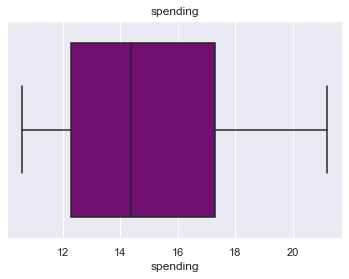

In [15]:
plt.title('spending')
sns.boxplot(df['spending'],orient='horizondal',color='purple')

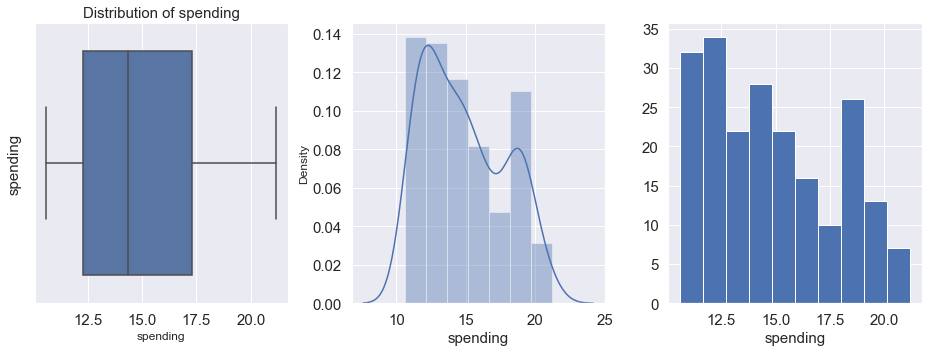

In [16]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
#boxplot
sns.boxplot(x='spending',data=df,orient='v',ax=ax1)
ax1.set_ylabel('spending', fontsize=15)
ax1.set_title('Distribution of spending', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['spending'],ax=ax2)
ax2.set_xlabel('spending', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['spending'])
ax3.set_xlabel('spending', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [17]:
print('Range of values: ', df['advance_payments'].max()-df['advance_payments'].min())

Range of values:  4.84


In [18]:
#Central values 
print('Minimum advance_payments: ', df['advance_payments'].min())
print('Maximum advance_payments: ',df['advance_payments'].max())
print('Mean value: ', df['advance_payments'].mean())
print('Median value: ',df['advance_payments'].median())
print('Standard deviation: ', df['advance_payments'].std())
print('Null values: ',df['advance_payments'].isnull().any())

Minimum advance_payments:  12.41
Maximum advance_payments:  17.25
Mean value:  14.559285714285727
Median value:  14.32
Standard deviation:  1.305958726564022
Null values:  False


In [19]:
#Quartiles

Q1=df['advance_payments'].quantile(q=0.25)
Q3=df['advance_payments'].quantile(q=0.75)
print('advance_payments - 1st Quartile (Q1) is: ', Q1)
print('advance_payments - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of advance_payments is ', stats.iqr(df['advance_payments']))

advance_payments - 1st Quartile (Q1) is:  13.45
advance_payments - 3st Quartile (Q3) is:  15.715
Interquartile range (IQR) of advance_payments is  2.2650000000000006


In [20]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in advance_payments: ', L_outliers)
print('Upper outliers in advance_payments: ', U_outliers)

Lower outliers in advance_payments:  10.052499999999998
Upper outliers in advance_payments:  19.1125


In [21]:
print('Number of outliers in advance_payments upper : ', df[df['advance_payments']>19.1125]['advance_payments'].count())
print('Number of outliers in advance_payments lower : ', df[df['advance_payments']<10.052499]['advance_payments'].count())
print('% of Outlier in advance_payments upper: ',round(df[df['advance_payments']>19.1125]['advance_payments'].count()*100/len(df)), '%')
print('% of Outlier in advance_payments lower: ',round(df[df['advance_payments']<10.052499]['advance_payments'].count()*100/len(df)), '%')

Number of outliers in advance_payments upper :  0
Number of outliers in advance_payments lower :  0
% of Outlier in advance_payments upper:  0 %
% of Outlier in advance_payments lower:  0 %


<AxesSubplot:title={'center':'advance_payments'}, xlabel='advance_payments'>

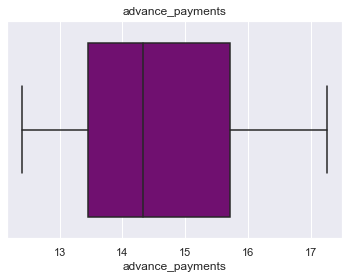

In [22]:
plt.title('advance_payments')
sns.boxplot(df['advance_payments'],orient='horizondal',color='purple')

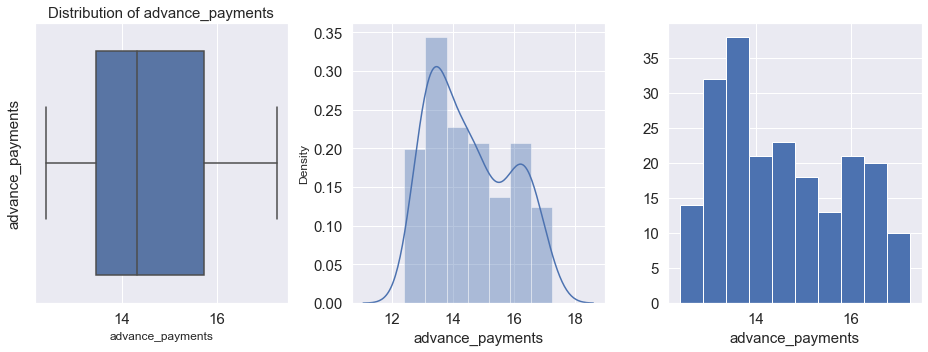

In [23]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
#boxplot
sns.boxplot(x='advance_payments',data=df,orient='v',ax=ax1)
ax1.set_ylabel('advance_payments', fontsize=15)
ax1.set_title('Distribution of advance_payments', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['advance_payments'],ax=ax2)
ax2.set_xlabel('advance_payments', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['advance_payments'])
ax3.set_xlabel('advance_payments', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()



In [24]:
print('Range of values: ', df['probability_of_full_payment'].max()-df['probability_of_full_payment'].min())

Range of values:  0.11019999999999996


In [25]:
print('Minimum probability_of_full_payment ', df['probability_of_full_payment'].min())
print('Maximum probability_of_full_payment: ',df['probability_of_full_payment'].max())
print('Mean value: ', df['probability_of_full_payment'].mean())
print('Median value: ',df['probability_of_full_payment'].median())
print('Standard deviation: ', df['probability_of_full_payment'].std())
print('Null values: ',df['probability_of_full_payment'].isnull().any())

Minimum probability_of_full_payment  0.8081
Maximum probability_of_full_payment:  0.9183
Mean value:  0.8709985714285714
Median value:  0.8734500000000001
Standard deviation:  0.0236294165838465
Null values:  False


In [26]:
Q1=df['probability_of_full_payment'].quantile(q=0.25)
Q3=df['probability_of_full_payment'].quantile(q=0.75)
print('probability_of_full_payment - 1st Quartile (Q1) is: ', Q1)
print('probability_of_full_payment - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of probability_of_full_payment is ', stats.iqr(df['probability_of_full_payment']))

probability_of_full_payment - 1st Quartile (Q1) is:  0.8569
probability_of_full_payment - 3st Quartile (Q3) is:  0.887775
Interquartile range (IQR) of probability_of_full_payment is  0.030874999999999986


In [27]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in probability_of_full_payment: ', L_outliers)
print('Upper outliers in probability_of_full_payment: ', U_outliers)

Lower outliers in probability_of_full_payment:  0.8105875
Upper outliers in probability_of_full_payment:  0.9340875


In [28]:
print('Number of outliers in probability_of_full_payment upper : ', df[df['probability_of_full_payment']>0.9340875]['probability_of_full_payment'].count())
print('Number of outliers in probability_of_full_payment lower : ', df[df['probability_of_full_payment']<0.8105875]['probability_of_full_payment'].count())
print('% of Outlier in probability_of_full_payment upper: ',round(df[df['probability_of_full_payment']>0.9340875]['probability_of_full_payment'].count()*100/len(df)), '%')
print('% of Outlier in probability_of_full_payment lower: ',round(df[df['probability_of_full_payment']<0.8105875]['probability_of_full_payment'].count()*100/len(df)), '%')

Number of outliers in probability_of_full_payment upper :  0
Number of outliers in probability_of_full_payment lower :  3
% of Outlier in probability_of_full_payment upper:  0 %
% of Outlier in probability_of_full_payment lower:  1 %


<AxesSubplot:title={'center':'probability_of_full_payment'}, xlabel='probability_of_full_payment'>

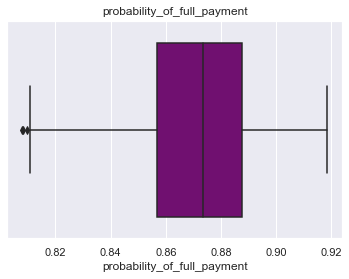

In [29]:
plt.title('probability_of_full_payment')
sns.boxplot(df['probability_of_full_payment'],orient='horizondal',color='purple')

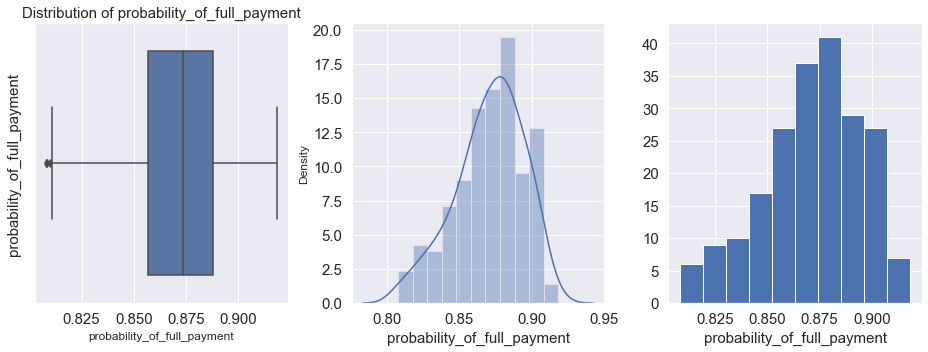

In [30]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='probability_of_full_payment',data=df,orient='v',ax=ax1)
ax1.set_ylabel('probability_of_full_payment', fontsize=15)
ax1.set_title('Distribution of probability_of_full_payment', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['probability_of_full_payment'],ax=ax2)
ax2.set_xlabel('probability_of_full_payment', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['probability_of_full_payment'])
ax3.set_xlabel('probability_of_full_payment', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [31]:
print('Range of values: ', df['current_balance'].max()-df['current_balance'].min())

Range of values:  1.7759999999999998


In [32]:
#Central values 
print('Minimum current_balance: ', df['current_balance'].min())
print('Maximum current_balance: ',df['current_balance'].max())
print('Mean value: ', df['current_balance'].mean())
print('Median value: ',df['current_balance'].median())
print('Standard deviation: ', df['current_balance'].std())
print('Null values: ',df['current_balance'].isnull().any())

Minimum current_balance:  4.899
Maximum current_balance:  6.675
Mean value:  5.628533333333335
Median value:  5.5235
Standard deviation:  0.44306347772644944
Null values:  False


In [33]:
Q1=df['current_balance'].quantile(q=0.25)
Q3=df['current_balance'].quantile(q=0.75)
print('current_balance - 1st Quartile (Q1) is: ', Q1)
print('current_balance - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of current_balance is ', stats.iqr(df['current_balance']))

current_balance - 1st Quartile (Q1) is:  5.26225
current_balance - 3st Quartile (Q3) is:  5.97975
Interquartile range (IQR) of current_balance is  0.7175000000000002


In [34]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in current_balance: ', L_outliers)
print('Upper outliers in current_balance: ', U_outliers)

Lower outliers in current_balance:  4.186
Upper outliers in current_balance:  7.056000000000001


In [35]:
print('Number of outliers in current_balance upper : ', df[df['current_balance']>7.056000000000001]['current_balance'].count())
print('Number of outliers in current_balance lower : ', df[df['current_balance']<4.186]['current_balance'].count())
print('% of Outlier in current_balance upper: ',round(df[df['current_balance']>7.056000000000001]['current_balance'].count()*100/len(df)), '%')
print('% of Outlier in current_balance lower: ',round(df[df['current_balance']<4.186]['current_balance'].count()*100/len(df)), '%')

Number of outliers in current_balance upper :  0
Number of outliers in current_balance lower :  0
% of Outlier in current_balance upper:  0 %
% of Outlier in current_balance lower:  0 %


<AxesSubplot:title={'center':'current_balance'}, xlabel='current_balance'>

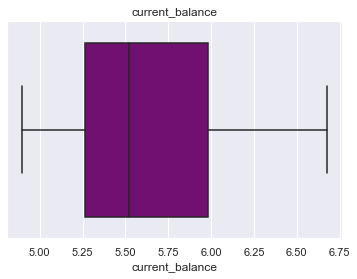

In [36]:
plt.title('current_balance')
sns.boxplot(df['current_balance'],orient='horizondal',color='purple')

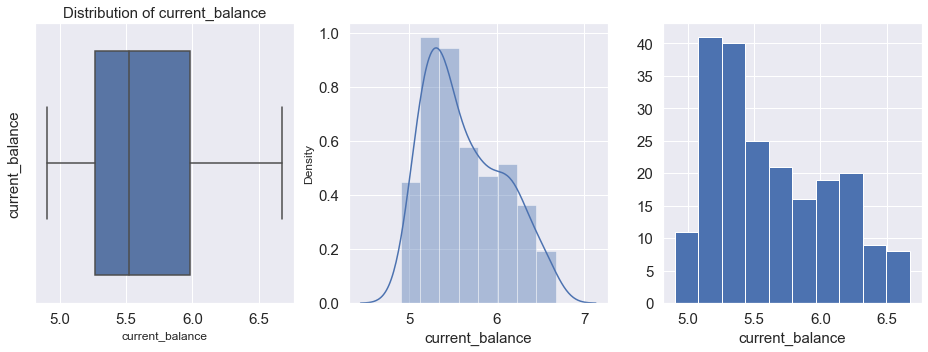

In [37]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='current_balance',data=df,orient='v',ax=ax1)
ax1.set_ylabel('current_balance', fontsize=15)
ax1.set_title('Distribution of current_balance', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['current_balance'],ax=ax2)
ax2.set_xlabel('current_balance', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['current_balance'])
ax3.set_xlabel('current_balance', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [38]:
print('Range of values: ', df['credit_limit'].max()-df['credit_limit'].min())

Range of values:  1.4030000000000005


In [39]:
#Central values 
print('Minimum credit_limit: ', df['credit_limit'].min())
print('Maximum credit_limit: ',df['credit_limit'].max())
print('Mean value: ', df['credit_limit'].mean())
print('Median value: ',df['credit_limit'].median())
print('Standard deviation: ', df['credit_limit'].std())
print('Null values: ',df['credit_limit'].isnull().any())

Minimum credit_limit:  2.63
Maximum credit_limit:  4.033
Mean value:  3.258604761904763
Median value:  3.237
Standard deviation:  0.37771444490658734
Null values:  False


In [40]:
#Quartiles

Q1=df['credit_limit'].quantile(q=0.25)
Q3=df['credit_limit'].quantile(q=0.75)
print('credit_limit - 1st Quartile (Q1) is: ', Q1)
print('credit_limit - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of credit_limit is ', stats.iqr(df['credit_limit']))

credit_limit - 1st Quartile (Q1) is:  2.944
credit_limit - 3st Quartile (Q3) is:  3.56175
Interquartile range (IQR) of credit_limit is  0.61775


In [41]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in credit_limit: ', L_outliers)
print('Upper outliers in credit_limit: ', U_outliers)

Lower outliers in credit_limit:  2.017375
Upper outliers in credit_limit:  4.488375


In [42]:
print('Number of outliers in credit_limit upper : ', df[df['credit_limit']>4.488375]['credit_limit'].count())
print('Number of outliers in credit_limit lower : ', df[df['credit_limit']<2.017375]['credit_limit'].count())
print('% of Outlier in credit_limit upper: ',round(df[df['credit_limit']>4.488375]['credit_limit'].count()*100/len(df)), '%')
print('% of Outlier in credit_limit lower: ',round(df[df['credit_limit']<2.017375]['credit_limit'].count()*100/len(df)), '%')

Number of outliers in credit_limit upper :  0
Number of outliers in credit_limit lower :  0
% of Outlier in credit_limit upper:  0 %
% of Outlier in credit_limit lower:  0 %


<AxesSubplot:title={'center':'credit_limit'}, xlabel='credit_limit'>

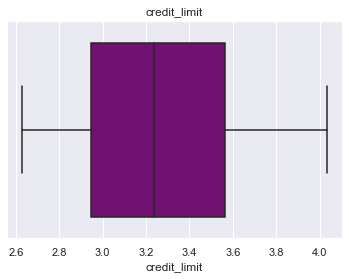

In [43]:
plt.title('credit_limit')
sns.boxplot(df['credit_limit'],orient='horizondal',color='purple')

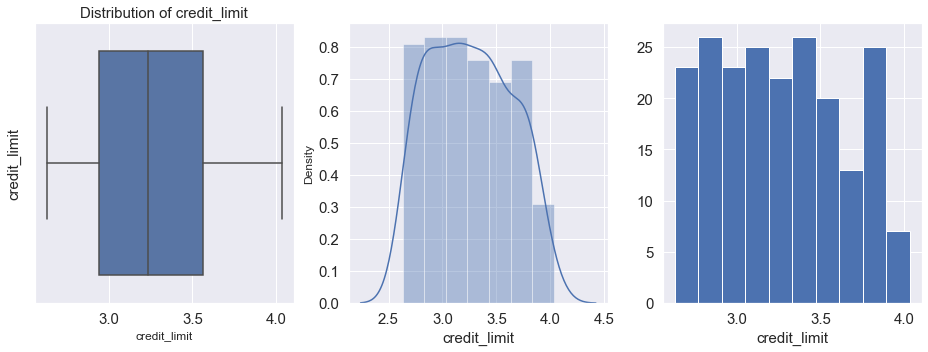

In [44]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='credit_limit',data=df,orient='v',ax=ax1)
ax1.set_ylabel('credit_limit', fontsize=15)
ax1.set_title('Distribution of credit_limit', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['credit_limit'],ax=ax2)
ax2.set_xlabel('credit_limit', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['credit_limit'])
ax3.set_xlabel('credit_limit', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [45]:
print('Range of values: ', df['min_payment_amt'].max()-df['min_payment_amt'].min())

Range of values:  7.690899999999999


In [46]:
#Central values 
print('Minimum min_payment_amt: ', df['min_payment_amt'].min())
print('Maximum min_payment_amt: ',df['min_payment_amt'].max())
print('Mean value: ', df['min_payment_amt'].mean())
print('Median value: ',df['min_payment_amt'].median())
print('Standard deviation: ', df['min_payment_amt'].std())
print('Null values: ',df['min_payment_amt'].isnull().any())

Minimum min_payment_amt:  0.7651
Maximum min_payment_amt:  8.456
Mean value:  3.7002009523809503
Median value:  3.599
Standard deviation:  1.5035571308217792
Null values:  False


In [47]:
#Quartiles

Q1=df['min_payment_amt'].quantile(q=0.25)
Q3=df['min_payment_amt'].quantile(q=0.75)
print('min_payment_amt - 1st Quartile (Q1) is: ', Q1)
print('min_payment_amt - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of min_payment_amt is ', stats.iqr(df['min_payment_amt']))

min_payment_amt - 1st Quartile (Q1) is:  2.5615
min_payment_amt - 3st Quartile (Q3) is:  4.76875
Interquartile range (IQR) of min_payment_amt is  2.2072499999999997


In [48]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in min_payment_amt: ', L_outliers)
print('Upper outliers in min_payment_amt: ', U_outliers)

Lower outliers in min_payment_amt:  -0.7493749999999992
Upper outliers in min_payment_amt:  8.079625


In [49]:
print('Number of outliers in min_payment_amt upper : ', df[df['min_payment_amt']>8.079625]['min_payment_amt'].count())
print('Number of outliers in min_payment_amt lower : ', df[df['min_payment_amt']<-0.749375]['min_payment_amt'].count())
print('% of Outlier in min_payment_amt upper: ',round(df[df['min_payment_amt']>8.079625]['min_payment_amt'].count()*100/len(df)), '%')
print('% of Outlier in min_payment_amt lower: ',round(df[df['min_payment_amt']<-0.749375]['min_payment_amt'].count()*100/len(df)), '%')

Number of outliers in min_payment_amt upper :  2
Number of outliers in min_payment_amt lower :  0
% of Outlier in min_payment_amt upper:  1 %
% of Outlier in min_payment_amt lower:  0 %


<AxesSubplot:title={'center':'min_payment_amt'}, xlabel='min_payment_amt'>

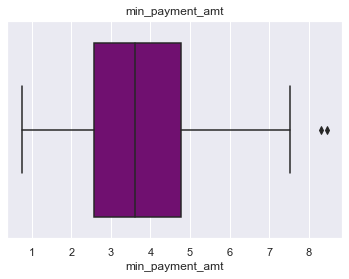

In [50]:
plt.title('min_payment_amt')
sns.boxplot(df['min_payment_amt'],orient='horizondal',color='purple')

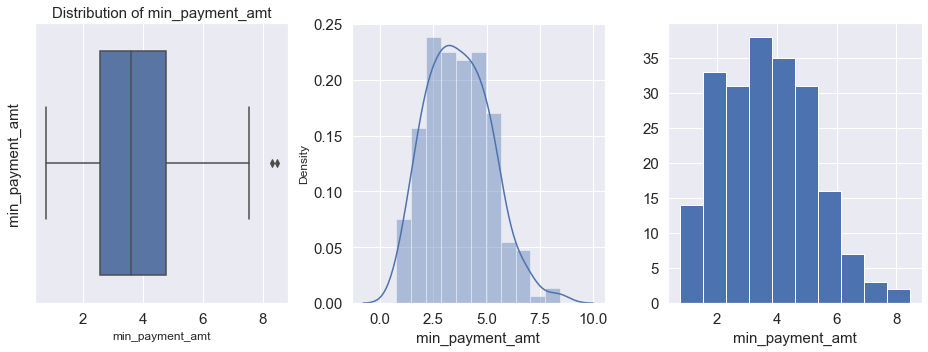

In [51]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='min_payment_amt',data=df,orient='v',ax=ax1)
ax1.set_ylabel('min_payment_amt', fontsize=15)
ax1.set_title('Distribution of min_payment_amt', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['min_payment_amt'],ax=ax2)
ax2.set_xlabel('min_payment_amt', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['min_payment_amt'])
ax3.set_xlabel('min_payment_amt', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [52]:
print('Range of values: ', df['max_spent_in_single_shopping'].max()-df['max_spent_in_single_shopping'].min())

Range of values:  2.0309999999999997


In [53]:
#Central values 
print('Minimum max_spent_in_single_shopping: ', df['max_spent_in_single_shopping'].min())
print('Maximum max_spent_in_single_shoppings: ',df['max_spent_in_single_shopping'].max())
print('Mean value: ', df['max_spent_in_single_shopping'].mean())
print('Median value: ',df['max_spent_in_single_shopping'].median())
print('Standard deviation: ', df['max_spent_in_single_shopping'].std())
print('Null values: ',df['max_spent_in_single_shopping'].isnull().any())

Minimum max_spent_in_single_shopping:  4.519
Maximum max_spent_in_single_shoppings:  6.55
Mean value:  5.408071428571429
Median value:  5.223000000000001
Standard deviation:  0.49148049910240543
Null values:  False


In [54]:
Q1=df['max_spent_in_single_shopping'].quantile(q=0.25)
Q3=df['max_spent_in_single_shopping'].quantile(q=0.75)
print('max_spent_in_single_shopping - 1st Quartile (Q1) is: ', Q1)
print('max_spent_in_single_shopping - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of max_spent_in_single_shopping is ', stats.iqr(df['max_spent_in_single_shopping']))

max_spent_in_single_shopping - 1st Quartile (Q1) is:  5.045
max_spent_in_single_shopping - 3st Quartile (Q3) is:  5.877
Interquartile range (IQR) of max_spent_in_single_shopping is  0.8319999999999999


In [55]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in max_spent_in_single_shopping: ', L_outliers)
print('Upper outliers in max_spent_in_single_shopping: ', U_outliers)

Lower outliers in max_spent_in_single_shopping:  3.797
Upper outliers in max_spent_in_single_shopping:  7.125


In [56]:
print('Number of outliers in max_spent_in_single_shopping upper : ', df[df['max_spent_in_single_shopping']>7.125000000000002]['max_spent_in_single_shopping'].count())
print('Number of outliers in max_spent_in_single_shopping lower : ', df[df['max_spent_in_single_shopping']<3.796999999999999]['max_spent_in_single_shopping'].count())
print('% of Outlier in max_spent_in_single_shopping upper: ',round(df[df['max_spent_in_single_shopping']>7.125000000000002]['max_spent_in_single_shopping'].count()*100/len(df)), '%')
print('% of Outlier in max_spent_in_single_shopping lower: ',round(df[df['max_spent_in_single_shopping']<3.796999999999999]['max_spent_in_single_shopping'].count()*100/len(df)), '%')

Number of outliers in max_spent_in_single_shopping upper :  0
Number of outliers in max_spent_in_single_shopping lower :  0
% of Outlier in max_spent_in_single_shopping upper:  0 %
% of Outlier in max_spent_in_single_shopping lower:  0 %


<AxesSubplot:title={'center':'max_spent_in_single_shopping'}, xlabel='max_spent_in_single_shopping'>

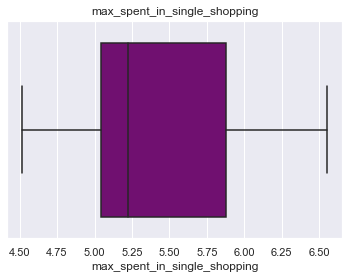

In [57]:
plt.title('max_spent_in_single_shopping')
sns.boxplot(df['max_spent_in_single_shopping'],orient='horizondal',color='purple')

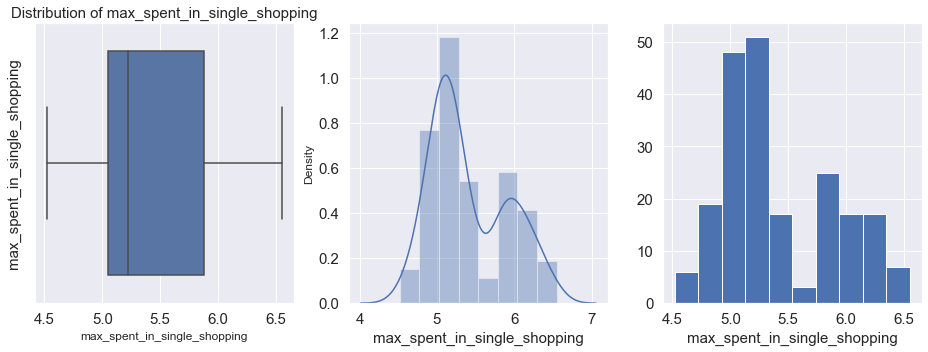

In [58]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='max_spent_in_single_shopping',data=df,orient='v',ax=ax1)
ax1.set_ylabel('max_spent_in_single_shopping', fontsize=15)
ax1.set_title('Distribution of max_spent_in_single_shopping', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['max_spent_in_single_shopping'],ax=ax2)
ax2.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['max_spent_in_single_shopping'])
ax3.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

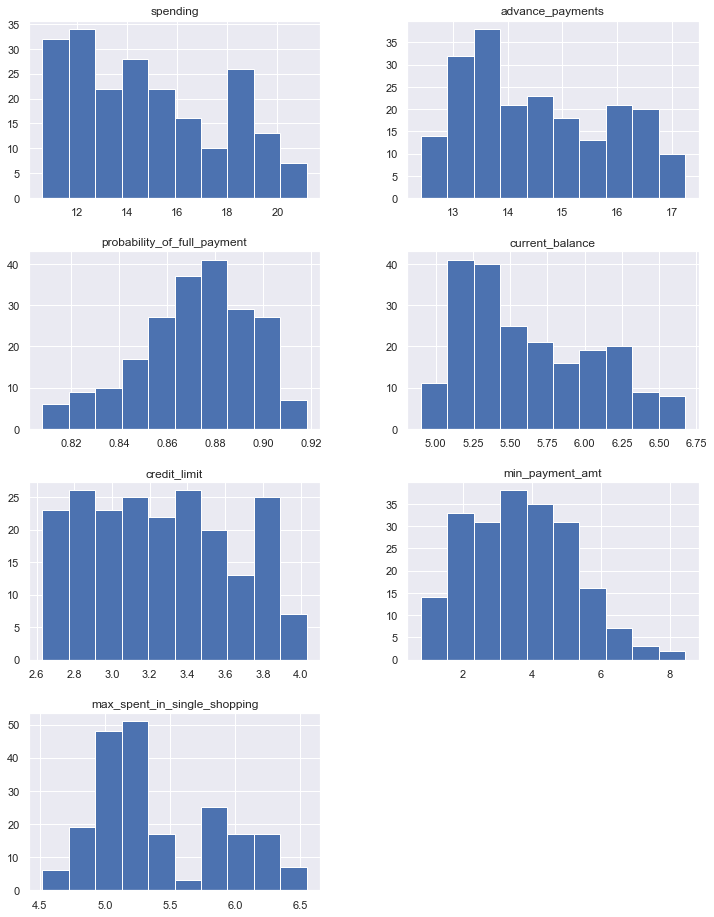

In [59]:
# Let's us only plot the distributions of independent attributes
df.hist(figsize=(12,16),layout=(4,2));

In [60]:
# Let's check the skewness values quantitatively
df.skew().sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

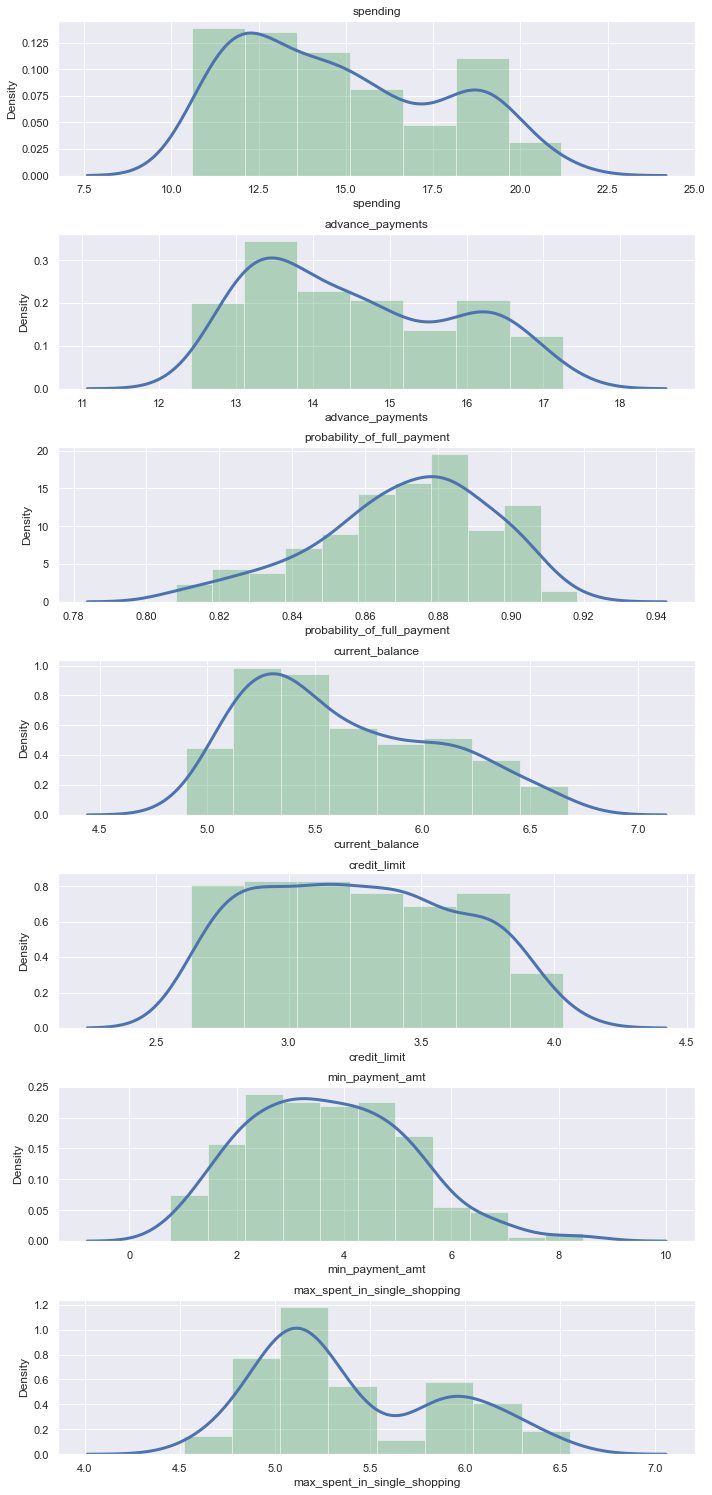

In [63]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 


plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(df.columns[i])

plt.tight_layout()

- Credit limit average is around $3.258(10000s)
- Distrubtion is skewed to right tail for all the variable execpt probability_of_full_payment variable, which has left tail

## Multivariate analysis

## Check for multicollinearity

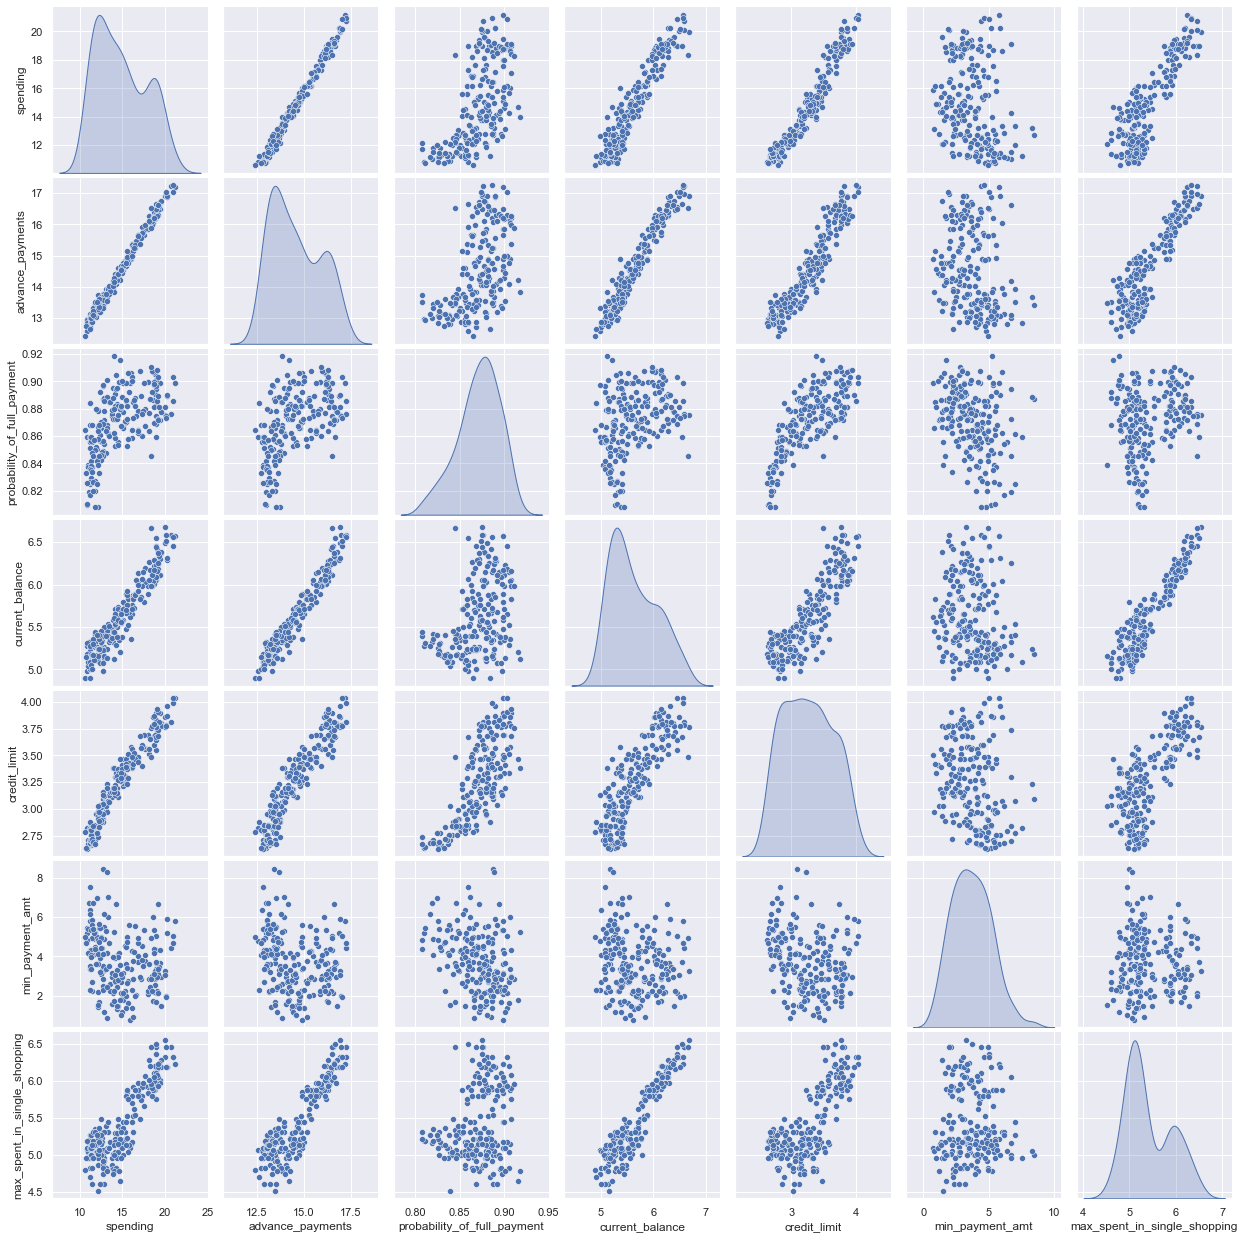

In [62]:
sns.pairplot(df,diag_kind='kde');

- Strong positive correlation between 
        - spending & advance_payments, 
        - advance_payments & current_balance, 
        - credit_limit & spending
        - spending & current_balance
        - credit_limit & advance_payments
        - max_spent_in_single_shopping  current_balance

In [63]:
#correlation matrix

df.corr().T

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


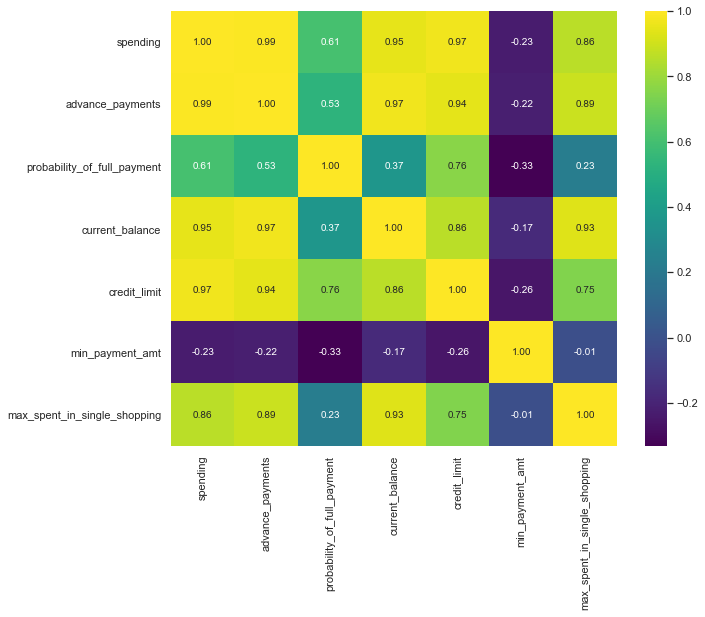

In [64]:
#creating a heatmap for better visualization
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="viridis")
plt.show()

In [65]:
# Let us see the significant correlation either negative or positive among independent attributes..
c = df.corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) & (so>0.3)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

correlation
advance_payments             spending                         0.994341
                             current_balance                  0.972422
credit_limit                 spending                         0.970771
current_balance              spending                         0.949985
advance_payments             credit_limit                     0.944829
max_spent_in_single_shopping current_balance                  0.932806
advance_payments             max_spent_in_single_shopping     0.890784
spending                     max_spent_in_single_shopping     0.863693
current_balance              credit_limit                     0.860415
probability_of_full_payment  credit_limit                     0.761635
max_spent_in_single_shopping credit_limit                     0.749131
spending                     probability_of_full_payment      0.608288
advance_payments             probability_of_full_payment      0.529244
probability_of_full_payment  current_balance                  0.367915
                             min_payment_amt                  0.331471

### Strategy to remove outliers: We choose to replace attribute outlier values by their respective medians , instead of dropping them, as we will lose other column info and also there outlier are present only in two avariables and within 5 records.

In [66]:
clean_dataset=df.copy()

In [67]:
def check_outliers(data):
    vData_num = data.loc[:,data.columns != 'class']
    Q1 = vData_num.quantile(0.25)
    Q3 = vData_num.quantile(0.75)
    IQR = Q3 - Q1
    count = 0
    # checking for outliers, True represents outlier
    vData_num_mod = ((vData_num < (Q1 - 1.5 * IQR)) |(vData_num > (Q3 + 1.5 * IQR)))
    #iterating over columns to check for no.of outliers in each of the numerical attributes.
    for col in vData_num_mod:
        if(1 in vData_num_mod[col].value_counts().index):
            print("No. of outliers in %s: %d" %( col, vData_num_mod[col].value_counts().iloc[1]))
            count += 1
    print("\n\nNo of attributes with outliers are :", count)
    
check_outliers(df)

No. of outliers in probability_of_full_payment: 3
No. of outliers in min_payment_amt: 2


No of attributes with outliers are : 2


### let us remove the outliers

#### for column in clean_dataset.columns.tolist(): Q1 = clean_dataset[column].quantile(.25) # 1st quartile Q3 = clean_dataset[column].quantile(.75) # 3rd quartile IQR = Q3-Q1 # get inter quartile range

In [68]:
check_outliers(clean_dataset)

No. of outliers in probability_of_full_payment: 3
No. of outliers in min_payment_amt: 2


No of attributes with outliers are : 2


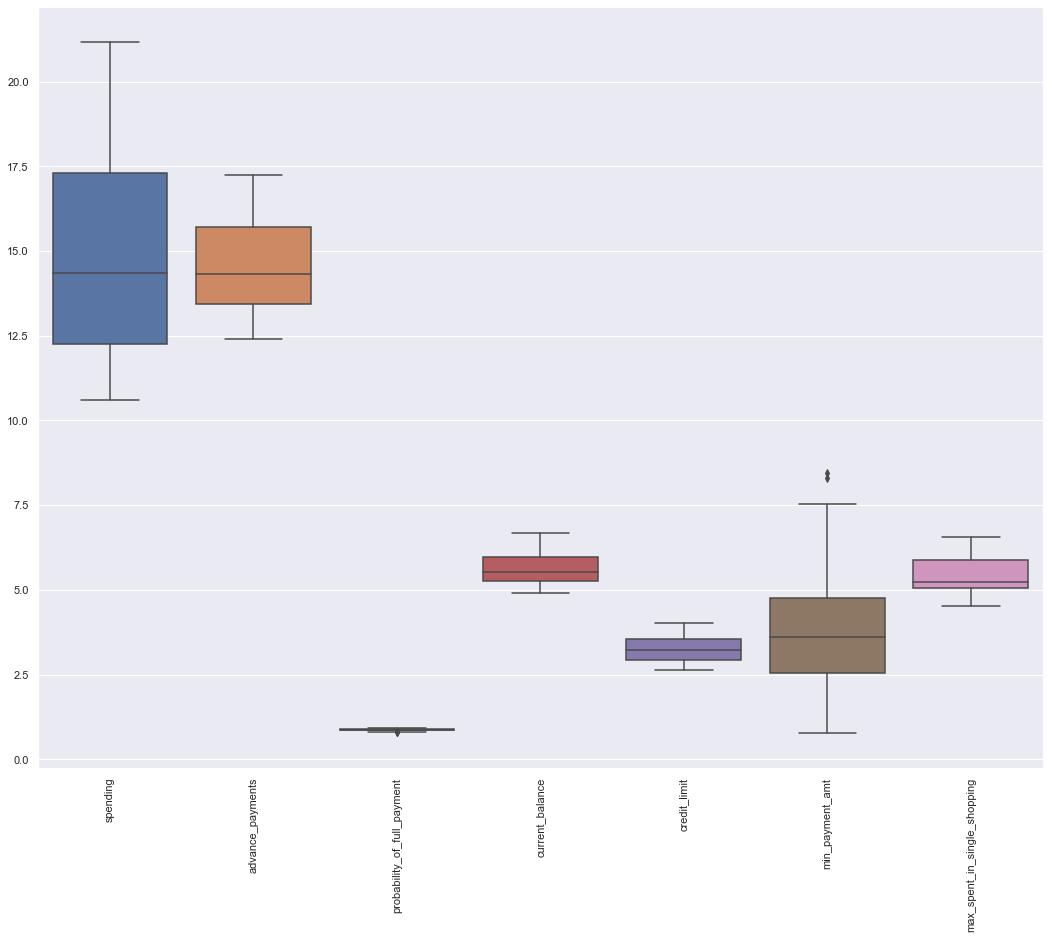

In [69]:
# Let us check presence of outliers
plt.figure(figsize=(18,14))
box = sns.boxplot(data=clean_dataset)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);


### Observation

Most of the outlier has been treated and now we are good to go.


<AxesSubplot:title={'center':'probability_of_full_payment'}, xlabel='probability_of_full_payment'>

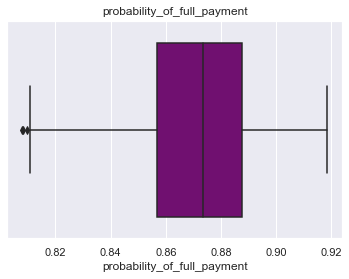

In [70]:
plt.title('probability_of_full_payment')
sns.boxplot(clean_dataset['probability_of_full_payment'],orient='horizondal',color='purple')


### Observation

Though we did treated the outlier, we still see one as per the boxplot, it is okay, as it is no extrme and on lower band.


### 1.2 Do you think scaling is necessary for clustering in this case? Justify The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling and which method is he/she using to do the scaling. Can also comment on how that method works.

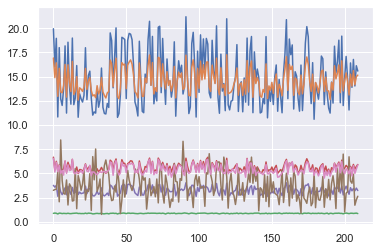

In [71]:
# prior to scaling 
plt.plot(clean_dataset)
plt.show()

In [72]:
# Scaling the attributes.

from scipy.stats import zscore
clean_dataset_Scaled=df.apply(zscore)
clean_dataset_Scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


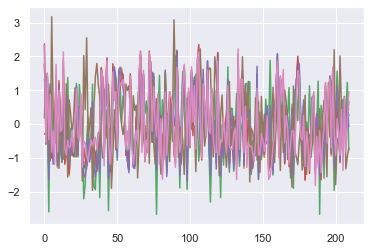

In [73]:
#after scaling
plt.plot(clean_dataset_Scaled)
plt.show()

### 1.3 Apply hierarchical clustering to scaled data (3 pts). Identify the number of optimum clusters using Dendrogram and briefly describe them (4). Students are expected to apply hierarchical clustering. It can be obtained via Fclusters or Agglomerative Clustering. Report should talk about the used criterion, affinity and linkage. Report must contain a Dendrogram and a logical reason behind choosing the optimum number of clusters and Inferences on the dendrogram. Customer segmentation can be visualized using limited features or whole data but it should be clear, correct and logical. Use appropriate plots to visualize the clusters.

In [74]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [75]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [76]:
link_method = linkage(clean_dataset_Scaled, method = 'average')

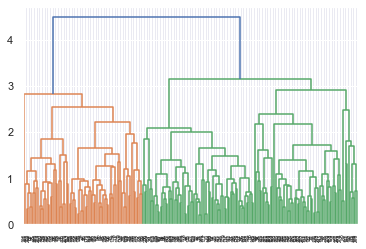

In [77]:
dend = dendrogram(link_method)

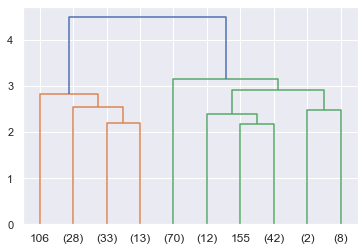

In [78]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10)

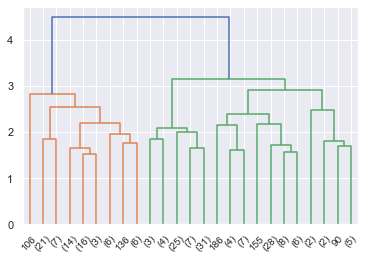

In [79]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 25)

In [80]:
from scipy.cluster.hierarchy import fcluster

In [81]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'

clusters_3 = fcluster(link_method, 3, criterion='maxclust')
clusters_3

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [82]:
cluster3_dataset=df.copy()

In [83]:
cluster3_dataset['clusters-3'] = clusters_3

In [84]:
cluster3_dataset['clusters-3'] = cluste

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters-3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [85]:
cluster3_dataset['clusters-3'].value_counts().sort_index()

1    75
2    70
3    65
Name: clusters-3, dtype: int64

In [86]:
aggdata=cluster3_dataset.groupby('clusters-3').mean()
aggdata['Freq']=cluster3_dataset['clusters-3'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters-3,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65


In [87]:
wardlink = linkage(clean_dataset_Scaled, method = 'ward')

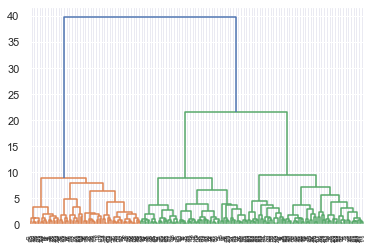

In [88]:
dend_wardlink = dendrogram(wardlink)

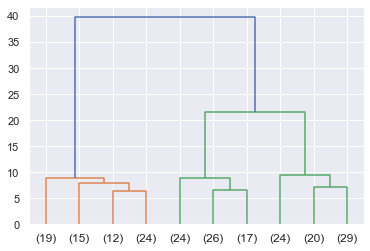

In [89]:
dend_wardlink = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [90]:
clusters_wdlk_3 = fcluster(wardlink, 3, criterion='maxclust')
clusters_wdlk_3

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [91]:
cluster_w_3_dataset=df.copy()

In [92]:
cluster_w_3_dataset['clusters-3'] = clusters_wdlk_3

In [93]:
cluster_w_3_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters-3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [94]:
cluster_w_3_dataset['clusters-3'].value_counts().sort_index()

1    70
2    67
3    73
Name: clusters-3, dtype: int64

In [95]:
aggdata_w=cluster_w_3_dataset.groupby('clusters-3').mean()
aggdata_w['Freq']=cluster_w_3_dataset['clusters-3'].value_counts().sort_index()
aggdata_w

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters-3,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


## Observation

###### Both the method are almost similer means , minor variation, which we know it occurs.
We for cluster grouping based on the dendrogram, 3 or 4 looks good. Did the further analysis, and based on the dataset had gone for 3 group cluster solution based on the hierarchical clustering
Also in real time, there colud have been more variables value captured - tenure, BALANCE_FREQUENCY, balance, purchase, installment of purchase, others.
And three group cluster solution gives a pattern based on high/medium/low spending with max_spent_in_single_shopping (high value item) and probability_of_full_payment(payment made).

##### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters (2 pts). Apply elbow curve and silhouette score (3 pts). Interpret the inferences from the model (2.5 pts). K-means clustering code application with different number of clusters. Calculation of WSS(inertia for each value of k) Elbow Method must be applied and visualized with different values of K. Reasoning behind the selection of the optimal value of K must be explained properly. Silhouette Score must be calculated for the same values of K taken above and commented on. Report must contain logical and correct explanations for choosing the optimum clusters using both elbow method and silhouette scores. Append cluster labels obtained from K-means clustering into the original data frame. Customer Segmentation can be visualized using appropriate graphs.

In [96]:
from sklearn.cluster import KMeans 

In [97]:
k_means = KMeans(n_clusters = 1)
k_means.fit(clean_dataset_Scaled)
k_means.inertia_

1469.9999999999995

In [98]:
k_means = KMeans(n_clusters = 2)
k_means.fit(clean_dataset_Scaled)
k_means.inertia_

659.1717544870411

In [99]:
k_means = KMeans(n_clusters = 3)
k_means.fit(clean_dataset_Scaled)
k_means.inertia_

430.65897315130064

In [100]:
k_means = KMeans(n_clusters = 4)
k_means.fit(clean_dataset_Scaled)
k_means.inertia_

371.301721277542

In [101]:
wss =[] 

In [102]:
for i in range(1,11):
        KM = KMeans(n_clusters=i)
        KM.fit(clean_dataset_Scaled)
        wss.append(KM.inertia_)

In [103]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.746559847914,
 326.92718481430114,
 289.2668177089275,
 262.7467325348528,
 241.11665063964017,
 223.19262981529442,
 205.32700146141127]

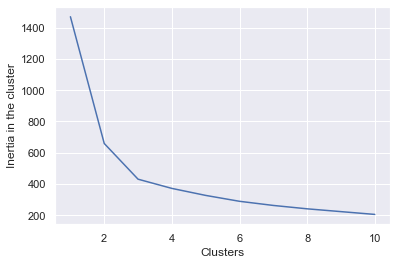

In [104]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [105]:
k_means_4 = KMeans(n_clusters = 4)
k_means_4.fit(clean_dataset_Scaled)
labels_4 = k_means_4.labels_

In [106]:
kmeans4_dataset=df.copy()

In [107]:
kmeans4_dataset["Clus_kmeans"] = labels_4
kmeans4_dataset.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [108]:
kmeans4_dataset["Clus_kmeans"] = labels_4
kmeans4_dataset.head(5)

In [109]:
kmeans4_dataset.head(5)

0.3347912611982698

In [110]:
from sklearn import metrics

In [111]:
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(clean_dataset_Scaled)
    scores.append(metrics.silhouette_score(clean_dataset_Scaled, km.labels_))
    
scores

[0.46577247686580914,
 0.40072705527512986,
 0.3291966792017613,
 0.28316654897654814,
 0.2897583830272519,
 0.2694844355168536,
 0.2543731602750563,
 0.2623959398663564,
 0.2673980772529918]

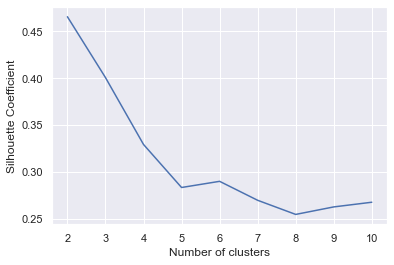

In [112]:
#plotting the sc scores
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [113]:
sil_width = silhouette_samples(clean_dataset_Scaled,labels_4)

In [114]:
kmeans4_dataset["sil_width"] = sil_width
kmeans4_dataset.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.472460
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0.063400
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.494127
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,0.530355
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.152686


In [115]:
silhouette_samples(clean_dataset_Scaled,labels_4).min()

-0.020412913640457993

### 3 Cluster Solution

In [116]:
km_3 = KMeans(n_clusters=3,random_state=123)

In [117]:
#fitting the Kmeans 
km_3.fit(clean_dataset_Scaled)
km_3.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

In [118]:
#proportion of labels classified

pd.Series(km_3.labels_).value_counts()

1    72
2    71
0    67
dtype: int64

#### K-Means Clustering & Cluster Information

In [119]:
kmeans1_dataset=df.copy()

In [120]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clean_dataset_Scaled)

#beginning of  the cluster numbering with 1 instead of 0

y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster

cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1

kmeans1_dataset['cluster'] = cluster
#Mean of clusters

kmeans_mean_cluster = pd.DataFrame(round(kmeans1_dataset.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,18.5,16.2,0.9,6.2,3.7,3.6,6.0
2,11.9,13.2,0.8,5.2,2.8,4.7,5.1
3,14.4,14.3,0.9,5.5,3.3,2.7,5.1


In [121]:
def ClusterPercentage(datafr,name):
    """Common utility function to calculate the percentage and size of cluster"""
    
    size = pd.Series(datafr[name].value_counts().sort_index())
    percent = pd.Series(round(datafr[name].value_counts()/datafr.shape[0] * 100,2)).sort_index()

    size_df = pd.concat([size, percent],axis=1)
    size_df.columns = ["Cluster_Size","Cluster_Percentage"]
    
    return(size_df)

In [122]:
ClusterPercentage(kmeans1_dataset,"cluster")

,Cluster_Size,Cluster_Percentage
1,67,31.90
2,72,34.29
3,71,33.81


In [123]:
#transposing the cluster
cluster_3_T = kmeans_mean_cluster.T

In [124]:
cluster_3_T

cluster,1,2,3
spending,18.5,11.9,14.4
advance_payments,16.2,13.2,14.3
probability_of_full_payment,0.9,0.8,0.9
current_balance,6.2,5.2,5.5
credit_limit,3.7,2.8,3.3
min_payment_amt,3.6,4.7,2.7
max_spent_in_single_shopping,6.0,5.1,5.1


#### Note
I am going with 3 clusters via kmeans, but am showing the analysis of 4 and 5 kmeans cluster, I see we based on current dataset given, 3 cluster solution makes sense based on the spending pattern (High, Medium, Low)

###### 4-Cluster Solution

In [125]:
km_4 = KMeans(n_clusters=4,random_state=123)

In [126]:
#fitting the Kmeans 
km_4.fit(clean_dataset_Scaled)
km_4.labels_

array([2, 1, 2, 0, 2, 0, 0, 1, 2, 0, 2, 3, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0,
       2, 0, 1, 3, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 3, 2,
       0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 3, 0, 0, 0, 2, 1, 0, 0, 3, 1, 2,
       2, 1, 2, 1, 1, 0, 2, 2, 0, 2, 1, 0, 3, 1, 1, 1, 1, 2, 0, 3, 3, 3,
       3, 0, 1, 2, 1, 0, 1, 2, 2, 3, 0, 2, 1, 2, 3, 2, 1, 2, 2, 0, 1, 2,
       3, 1, 2, 0, 0, 3, 1, 3, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1,
       1, 2, 0, 2, 2, 0, 3, 1, 3, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 3,
       1, 1, 1, 0, 1, 2, 2, 0, 2, 3, 2, 0, 3, 1, 1, 0, 1, 0, 1, 2, 2, 2,
       1, 1, 3, 0, 1, 1, 1, 1, 3, 3, 1, 3, 1, 0, 1, 1, 0, 2, 1, 3, 2, 0,
       2, 0, 1, 3, 1, 0, 3, 1, 3, 1, 3, 3])

In [127]:
#proportion of labels classified

pd.Series(km_4.labels_).value_counts()

1    65
0    64
2    51
3    30
dtype: int64

In [128]:
kmeans14_dataset=df.copy()

In [129]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clean_dataset_Scaled)

#beginning of  the cluster numbering with 1 instead of 0

y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster

cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1

kmeans14_dataset['cluster'] = cluster
#Mean of clusters

kmeans_mean_cluster = pd.DataFrame(round(kmeans14_dataset.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,16.4,15.3,0.9,5.9,3.4,3.9,5.7
2,14.0,14.1,0.9,5.4,3.2,2.6,5.0
3,19.2,16.5,0.9,6.3,3.8,3.5,6.1
4,11.8,13.2,0.8,5.2,2.8,4.9,5.1


In [130]:
ClusterPercentage(kmeans14_dataset,"cluster")

,Cluster_Size,Cluster_Percentage
1,30,14.29
2,67,31.90
3,48,22.86
4,65,30.95


In [131]:
#transposing the cluster
cluster_4_T = kmeans_mean_cluster.T

In [132]:
cluster_4_T

cluster,1,2,3,4
spending,16.4,14.0,19.2,11.8
advance_payments,15.3,14.1,16.5,13.2
probability_of_full_payment,0.9,0.9,0.9,0.8
current_balance,5.9,5.4,6.3,5.2
credit_limit,3.4,3.2,3.8,2.8
min_payment_amt,3.9,2.6,3.5,4.9
max_spent_in_single_shopping,5.7,5.0,6.1,5.1


In [133]:
kmeans15_dataset=df.copy()

In [134]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clean_dataset_Scaled)

#beginning of  the cluster numbering with 1 instead of 0

y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster

cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1

kmeans15_dataset['cluster'] = cluster
#Mean of clusters

kmeans_mean_cluster = pd.DataFrame(round(kmeans15_dataset.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,19.2,16.5,0.9,6.3,3.8,3.5,6.1
2,11.7,13.2,0.8,5.3,2.8,4.5,5.2
3,14.3,14.3,0.9,5.5,3.3,2.4,5.1
4,16.4,15.3,0.9,5.9,3.4,3.9,5.7
5,12.3,13.3,0.9,5.2,3.0,5.0,5.0


In [135]:
ClusterPercentage(kmeans15_dataset,"cluster")

,Cluster_Size,Cluster_Percentage
1,48,22.86
2,41,19.52
3,56,26.67
4,29,13.81
5,36,17.14


In [136]:
#transposing the cluster
cluster_5_T = kmeans_mean_cluster.T

In [137]:
cluster_5_T

cluster,1,2,3,4,5
spending,19.2,11.7,14.3,16.4,12.3
advance_payments,16.5,13.2,14.3,15.3,13.3
probability_of_full_payment,0.9,0.8,0.9,0.9,0.9
current_balance,6.3,5.3,5.5,5.9,5.2
credit_limit,3.8,2.8,3.3,3.4,3.0
min_payment_amt,3.5,4.5,2.4,3.9,5.0
max_spent_in_single_shopping,6.1,5.2,5.1,5.7,5.0


### 1.5Describe cluster profiles for the clusters defined (2.5 pts). Recommend different promotional strategies for different clusters in context to the business problem in-hand (2.5 pts ). After adding the final clusters to the original dataframe, do the cluster profiling. Divide the data in the finalyzed groups and check their means. Explain each of the group briefly. There should be at least 3-4 Recommendations. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks will only be allotted if the recommendations are correct and business specific. variable means. Students to explain the profiles and suggest a mechanism to approach each cluster. Any logical explanation is acceptable.


### 3 group cluster via Kmeans

In [138]:
cluster_3_T

cluster,1,2,3
spending,18.5,11.9,14.4
advance_payments,16.2,13.2,14.3
probability_of_full_payment,0.9,0.8,0.9
current_balance,6.2,5.2,5.5
credit_limit,3.7,2.8,3.3
min_payment_amt,3.6,4.7,2.7
max_spent_in_single_shopping,6.0,5.1,5.1


### 3 group cluster via hierarchical clustering

In [139]:
aggdata_w.T

clusters-3,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848072,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.949433,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178
Freq,70.000000,67.000000,73.000000


### Cluster Group Profiles
##### Group 1 : High Spending
##### Group 3 : Medium Spending
##### Group 2 : Low Spending
##### Promotional strategies for each cluster
#### Group 1 : High Spending Group

- Giving any reward points might increase their purchases.
- maximum max_spent_in_single_shopping is high for this group, so can be offered discount/offer on next transactions upon full payment
- Increase there credit limit and 
- Increase spending habits
- Give loan against the credit card, as they are customers with good repayment record.
- Tie up with luxary brands, which will drive more one_time_maximun spending

#### Group 3 : Medium Spending Group

- They are potential target customers who are paying bills and doing purchases and maintaining comparatively good credit score. So we can increase credit limit or can lower down interest rate. 
- Promote premium cards/loyality cars to increase transcations.
- Increase spending habits by trying with premium ecommerce sites, travel portal, travel airlines/hotel, as this will encourge them to spend more

#### Group 2 : Low Spending Group

- customers should be given remainders for payments. Offers can be provided on early payments to improve their payment rate.
- Increase there spending habits by tieing up with grocery stores, utlities (electircity, phone, gas, others)

### THE END